In [31]:
import tsl
import torch
import numpy as np

np.set_printoptions(suppress=True)
tsl.logger.disabled = True

print(f"tsl version  : {tsl.__version__}")
print(f"torch version: {torch.__version__}")

tsl version  : 0.9.0
torch version: 1.13.1+cu117


In [32]:
from tsl.datasets import MetrLA
dataset = MetrLA()
print(dataset)

MetrLA(length=34272, n_nodes=207, n_channels=1)


In [33]:
print(f"Sampling period: {dataset.freq}\n"
      f"Has missing values: {dataset.has_mask}\n"
      f"Percentage of missing values: {(1 - dataset.mask.mean()) * 100:.2f}%\n"
      f"Has dataset exogenous variables: {dataset.has_covariates}\n"
      f"Relevant attributes: {', '.join(dataset.attributes.keys())}")

Sampling period: <5 * Minutes>
Has missing values: True
Percentage of missing values: 8.11%
Has dataset exogenous variables: True
Relevant attributes: dist


In [34]:
dataset.covariates['dist']

array([[    0. ,     inf,     inf, ...,     inf,  8114.8, 10009.7],
       [    inf,     0. ,  2504.6, ...,     inf,     inf,     inf],
       [    inf,  1489.3,     0. , ...,     inf,     inf,  9837. ],
       ...,
       [    inf,     inf,     inf, ...,     0. ,     inf,     inf],
       [ 9599.8,     inf,     inf, ...,     inf,     0. ,     inf],
       [10119.9,  9374.8,     inf, ...,     inf,  9018.7,     0. ]],
      dtype=float32)

In [35]:
print(dataset.dist)

[[    0.      inf     inf ...     inf  8114.8 10009.7]
 [    inf     0.   2504.6 ...     inf     inf     inf]
 [    inf  1489.3     0.  ...     inf     inf  9837. ]
 ...
 [    inf     inf     inf ...     0.      inf     inf]
 [ 9599.8     inf     inf ...     inf     0.      inf]
 [10119.9  9374.8     inf ...     inf  9018.7     0. ]]


In [36]:
dataset.dataframe().isna().sum().sum()

0

In [37]:
print(dataset.dataframe().shape)
dataset.dataframe().head(10)

(34272, 207)


nodes,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
channels,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500,64.500000,66.428574,66.875,59.375000,69.000000,59.250000,69.000000,61.875000
2012-03-01 00:05:00,62.666668,68.555557,65.444443,62.444443,64.444443,68.111115,65.000000,65.000000,57.444443,63.333332,...,50.666668,69.875,66.666664,58.555557,62.000,61.111111,64.444443,55.888889,68.444443,62.875000
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857140,62.000000
2012-03-01 00:15:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857140,62.000000
2012-03-01 00:20:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857140,62.000000
2012-03-01 00:25:00,57.333332,69.000000,67.666664,61.666668,67.333336,69.000000,60.666668,67.333336,63.000000,63.333332,...,42.000000,70.000,68.333336,57.333332,66.000,54.666668,64.666664,57.666668,69.000000,57.333332
2012-03-01 00:30:00,66.500000,63.875000,67.875000,62.375000,64.375000,67.750000,65.125000,64.875000,56.250000,63.000000,...,41.250000,69.375,59.500000,44.625000,64.250,62.625000,65.500000,51.000000,69.375000,61.250000
2012-03-01 00:35:00,63.625000,67.250000,63.250000,60.500000,57.375000,65.500000,64.625000,65.500000,60.375000,66.625000,...,52.000000,65.875,59.750000,64.125000,66.125,62.375000,67.500000,52.000000,68.625000,59.375000
2012-03-01 00:40:00,68.750000,65.250000,63.500000,63.000000,65.125000,68.000000,65.125000,63.750000,62.625000,66.750000,...,52.500000,68.375,61.250000,64.375000,66.500,66.250000,64.375000,48.625000,67.625000,61.750000


In [38]:
print(f"Default similarity: {dataset.similarity_score}\n"
      f"Available similarity options: {dataset.similarity_options}\n")

sim = dataset.get_similarity("distance")  # same as dataset.get_similarity()
print(sim[:10, :10])  # just check first 10 nodes for readability

Default similarity: distance
Available similarity options: {'distance'}

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.3909554  0.00001704 0.00001667 0.00000114
  0.00000105 0.3904571  0.         0.        ]
 [0.         0.7174379  1.         0.00069197 0.00068192 0.00000362
  0.00000334 0.09160372 0.         0.        ]
 [0.         0.00097331 0.00000242 1.         0.63372165 0.00402982
  0.01267532 0.0000023  0.         0.        ]
 [0.         0.00145201 0.000004   0.62646437 1.         0.05062024
  0.1351968  0.00000398 0.         0.        ]
 [0.         0.00148304 0.00000412 0.8948124  0.36143154 1.
  0.03901198 0.0000041  0.         0.        ]
 [0.         0.00000155 0.         0.01577749 0.00067244 0.05490443
  1.         0.         0.         0.        ]
 [0.         0.00520506 0.05249563 0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.     

In [39]:
type(sim)

numpy.ndarray

In [40]:
adj = dataset.get_connectivity(threshold=0.1,
                               include_self=False,
                               normalize_axis=1,
                               layout="edge_index")
print(adj)

(array([[  0,   0,   0, ..., 206, 206, 206],
       [ 13,  36,  58, ..., 157, 162, 198]]), array([0.07963489, 0.16290408, 0.0310139 , ..., 0.04530123, 0.03072186,
       0.11480146], dtype=float32))


In [41]:
edge_index, edge_weight = adj

print(edge_index.shape)
print(edge_weight)

(2, 1515)
[0.07963489 0.16290408 0.0310139  ... 0.04530123 0.03072186 0.11480146]


In [42]:
from tsl.ops.connectivity import edge_index_to_adj

dense = edge_index_to_adj(edge_index, edge_weight)
print(dense.shape)

(207, 207)


In [43]:
dataset.mask

array([[[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       ...,

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]],

       [[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]]])

In [44]:
from tsl.data import ImputationDataset

target, idx = dataset.numpy(return_idx=True)

torch_dataset = ImputationDataset(target=target,
                                      index=idx,
                                      connectivity=adj,
                                      input_mask=dataset.mask,
                                      eval_mask=dataset.mask,
                                      window=12,
                                      stride=1)
print(torch_dataset)

ImputationDataset(n_samples=34261, n_nodes=207, n_channels=1)


In [45]:
sample = torch_dataset[0]
print(sample)

Data(
  input=(x=[t=12, n=207, f=1], input_mask=[t=12, n=207, f=1], edge_index=[2, e=1515], edge_weight=[e=1515]),
  target=(y=[t=12, n=207, f=1]),
  has_mask=True
)


In [46]:
torch_dataset[0].pattern

{'x': 't n f',
 'input_mask': 't n f',
 'mask': 't n f',
 'edge_index': '2 e',
 'edge_weight': 'e',
 'y': 't n f'}

In [47]:
sample.input.to_dict()

{'x': tensor([[[64.3750],
          [67.6250],
          [67.1250],
          ...,
          [59.2500],
          [69.0000],
          [61.8750]],
 
         [[62.6667],
          [68.5556],
          [65.4444],
          ...,
          [55.8889],
          [68.4444],
          [62.8750]],
 
         [[64.0000],
          [63.7500],
          [60.0000],
          ...,
          [61.3750],
          [69.8571],
          [62.0000]],
 
         ...,
 
         [[63.5000],
          [61.5000],
          [62.5000],
          ...,
          [50.7500],
          [66.2500],
          [62.2500]],
 
         [[65.2222],
          [63.6667],
          [65.1111],
          ...,
          [60.5556],
          [67.2222],
          [60.0000]],
 
         [[62.2500],
          [67.7500],
          [66.8750],
          ...,
          [57.0000],
          [66.5000],
          [59.4286]]]),
 'input_mask': tensor([[[False],
          [False],
          [False],
          ...,
          [False],
          

In [48]:
sample.input.to_dict()

{'x': tensor([[[64.3750],
          [67.6250],
          [67.1250],
          ...,
          [59.2500],
          [69.0000],
          [61.8750]],
 
         [[62.6667],
          [68.5556],
          [65.4444],
          ...,
          [55.8889],
          [68.4444],
          [62.8750]],
 
         [[64.0000],
          [63.7500],
          [60.0000],
          ...,
          [61.3750],
          [69.8571],
          [62.0000]],
 
         ...,
 
         [[63.5000],
          [61.5000],
          [62.5000],
          ...,
          [50.7500],
          [66.2500],
          [62.2500]],
 
         [[65.2222],
          [63.6667],
          [65.1111],
          ...,
          [60.5556],
          [67.2222],
          [60.0000]],
 
         [[62.2500],
          [67.7500],
          [66.8750],
          ...,
          [57.0000],
          [66.5000],
          [59.4286]]]),
 'input_mask': tensor([[[False],
          [False],
          [False],
          ...,
          [False],
          

In [49]:
sample.pattern

{'x': 't n f',
 'input_mask': 't n f',
 'mask': 't n f',
 'edge_index': '2 e',
 'edge_weight': 'e',
 'y': 't n f'}

In [50]:
if sample.has_mask:
    print(sample.mask)
else:
    print("Sample has no mask.")

tensor([[[True],
         [True],
         [True],
         ...,
         [True],
         [True],
         [True]],

        [[True],
         [True],
         [True],
         ...,
         [True],
         [True],
         [True]],

        [[True],
         [True],
         [True],
         ...,
         [True],
         [True],
         [True]],

        ...,

        [[True],
         [True],
         [True],
         ...,
         [True],
         [True],
         [True]],

        [[True],
         [True],
         [True],
         ...,
         [True],
         [True],
         [True]],

        [[True],
         [True],
         [True],
         ...,
         [True],
         [True],
         [True]]])


In [51]:

if sample.has_transform:
    print(sample.transform)
else:
    print("Sample has no transform functions.")

Sample has no transform functions.


In [52]:
from tsl.data import SpatioTemporalDataModule
from tsl.data.preprocessing import StandardScaler

scalers = {'target': StandardScaler(axis=(0, 1))}

splitter = dataset.get_splitter(val_len=0.1, test_len=0.2)

dm = SpatioTemporalDataModule(
    dataset=torch_dataset,
    scalers=scalers,
    splitter=splitter,
    batch_size=64,
)

print(dm)

SpatioTemporalDataModule(train_len=None, val_len=None, test_len=None, scalers=[target], batch_size=64)


In [53]:
dm.setup()
print(dm)

SpatioTemporalDataModule(train_len=24657, val_len=2728, test_len=6852, scalers=[target], batch_size=64)


In [54]:
from tsl.metrics.torch import MaskedMAE, MaskedMAPE
from tsl.engines import Imputer
from tsl.nn.models import GRINModel

loss_fn = MaskedMAE()

metrics = {'mae': MaskedMAE(),
           'mape': MaskedMAPE(),
           'mae_at_15': MaskedMAE(at=2),  # '2' indicates the third time step,
                                          # which correspond to 15 minutes ahead
           'mae_at_30': MaskedMAE(at=5),
           'mae_at_60': MaskedMAE(at=11), }

model_kwargs = {
    'input_size': dm.n_channels,  # 1 channel
    #'horizon': dm.horizon,  # 12, the number of steps ahead to forecast
    #'hidden_size': 16,
    #'rnn_layers': 1,
    #'gcn_layers': 2
      'embedding_size':3,
      'n_nodes':dm.n_nodes
}

# setup predictor
predictor = Imputer(
    model_class=GRINModel,
    model_kwargs=model_kwargs,
    optim_class=torch.optim.Adam,
    optim_kwargs={'lr': 0.003},
    loss_fn=loss_fn,
    metrics=metrics
)

In [55]:
dm.n_channels

1

In [56]:
from pytorch_lightning.loggers import TensorBoardLogger

logger = TensorBoardLogger(save_dir="logs", name="tsl_intro", version=0)

In [57]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

In [59]:
CUDA_VISIBLE_DEVICES=1

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | loss_fn       | MaskedMAE        | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | test_metrics  | MetricCollection | 0     
4 | model         | GRINModel        | 229 K 
---------------------------------------------------
229 K     Trainable params
0         Non-trainable params
229 K     Total params
0.919     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/home/javier/anaconda3/envs/tsl/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:653: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [ ]:
torch.cuda.is_available()

In [ ]:
torch.cuda.device_count()

In [ ]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    dirpath='logs',
    save_top_k=1,
    monitor='val_mae',
    mode='min',
)

trainer = pl.Trainer(max_epochs=100,
                     logger=logger,
                     gpus=1 if torch.cuda.is_available() else None,
                     #limit_train_batches=100,
                     callbacks=[checkpoint_callback], )

trainer.fit(predictor, datamodule=dm)

In [ ]:
import pytorch_lightning as pl
pl.__version__

In [ ]:
import matplotlib.pyplot as plt

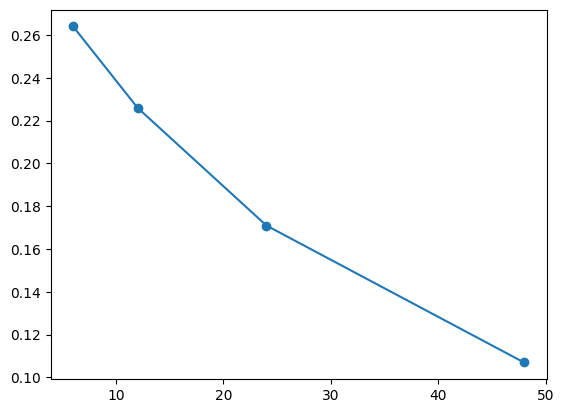

In [34]:
plt.figure()
plt.plot([6,12,24,48], [0.264, 0.226, 0.171, 0.107], marker='o')
plt.show()